# Problem Statement: 
Predicting the Car Price of used Cars, so that should help the management to understand how exactly the prices vary with the independent
variables.

Car Price Prediction is a really an interesting machine learning problem as there are many factors that influence the price of a car in the second-hand market. In this competition, we will be looking at a dataset based on sale/purchase of cars where our end goal will be to predict the price of the car given its features to maximize the profit.

## Import Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Read Dataset

In [5]:
# loading the data from csv file to pandas dataframe
df=car_dataset = pd.read_csv('car data.csv')

In [6]:
# inspecting the first 5 rows of the dataframe
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
# checking the number of rows and columns
car_dataset.shape

(301, 9)

In [8]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
# checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [76]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


# Exploratory Data Analysis
(EDA)is the process of systematically applying statistical and/or logical techniques to describe and illustrate, condense and recap, and evaluate data.

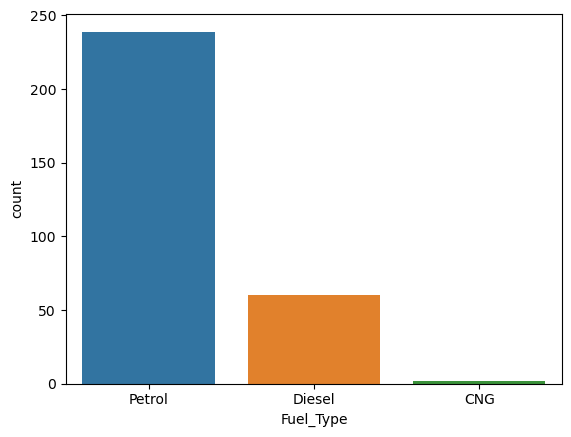

In [10]:
sns.countplot(x='Fuel_Type', data=df)
plt.show()

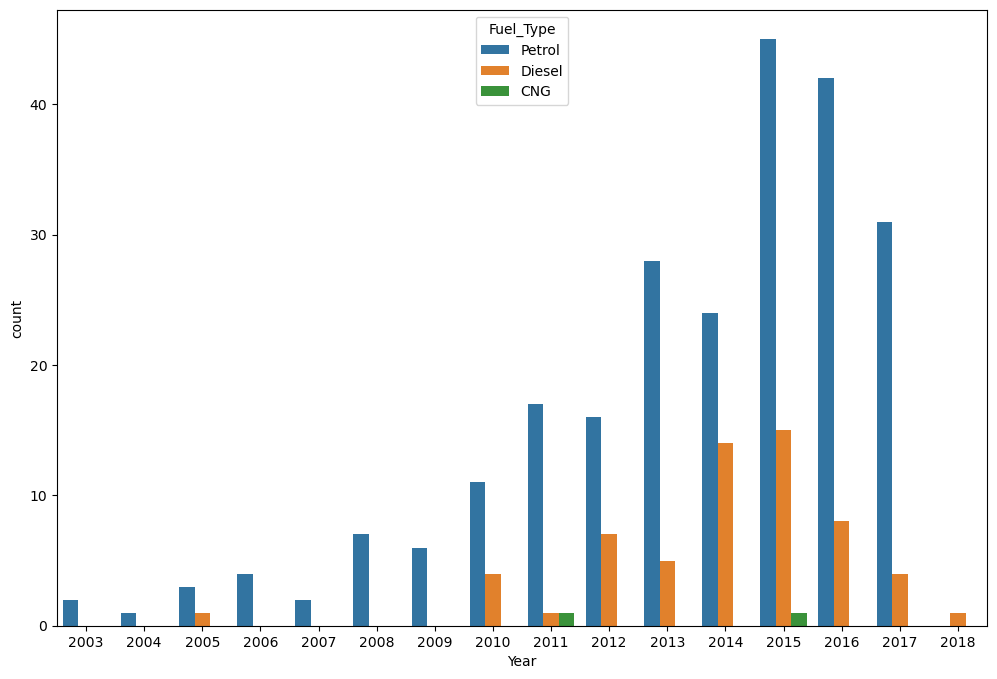

In [23]:
plt.figure(figsize=(12,8))
sns.countplot(x='Year', hue= 'Fuel_Type',data = df)
plt.show()

# Conclusion:
Compared to diesel and CNG, petrol is used more commonly.

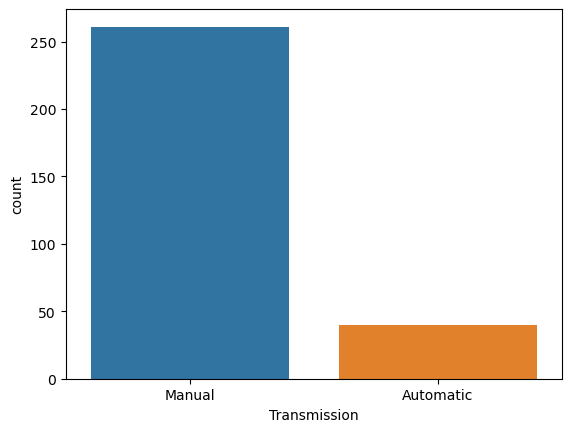

In [78]:
sns.countplot(x='Transmission', data=df)
plt.show()

<AxesSubplot:xlabel='Year', ylabel='count'>

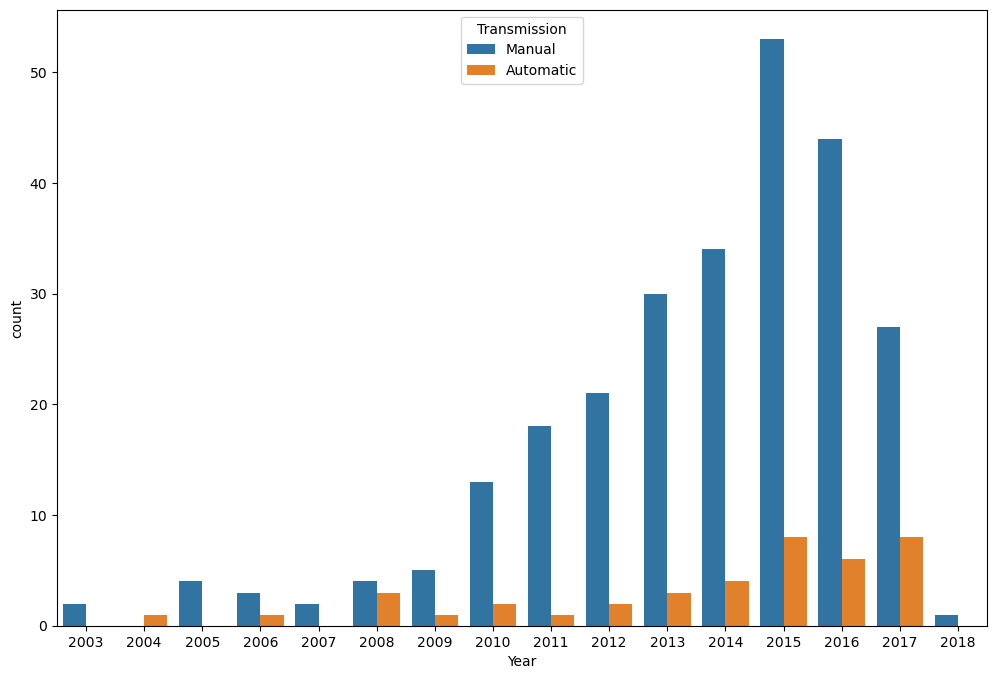

In [19]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Year', hue= 'Transmission',data = df)

# Conclusion:
In a car with a manual transmission, you can choose proper gear for the trip, changing when necessary. An automated car does exactly what it says on the tin, it chooses the appropriate gear for you based on your speed and the circumstances of the road. As a result, manual transmissions are used more often than automated transmissions.

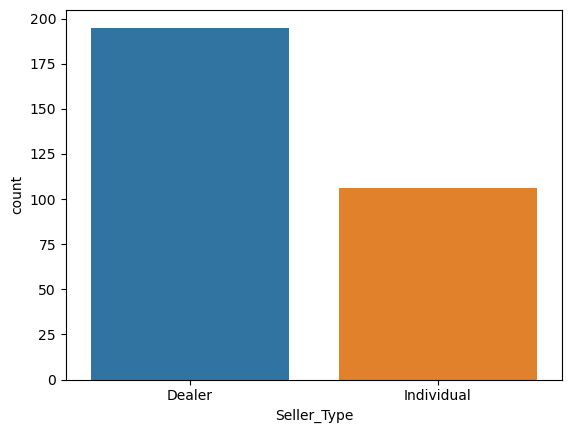

In [79]:
sns.countplot(x='Seller_Type', data=df)
plt.show()

<AxesSubplot:xlabel='Year', ylabel='count'>

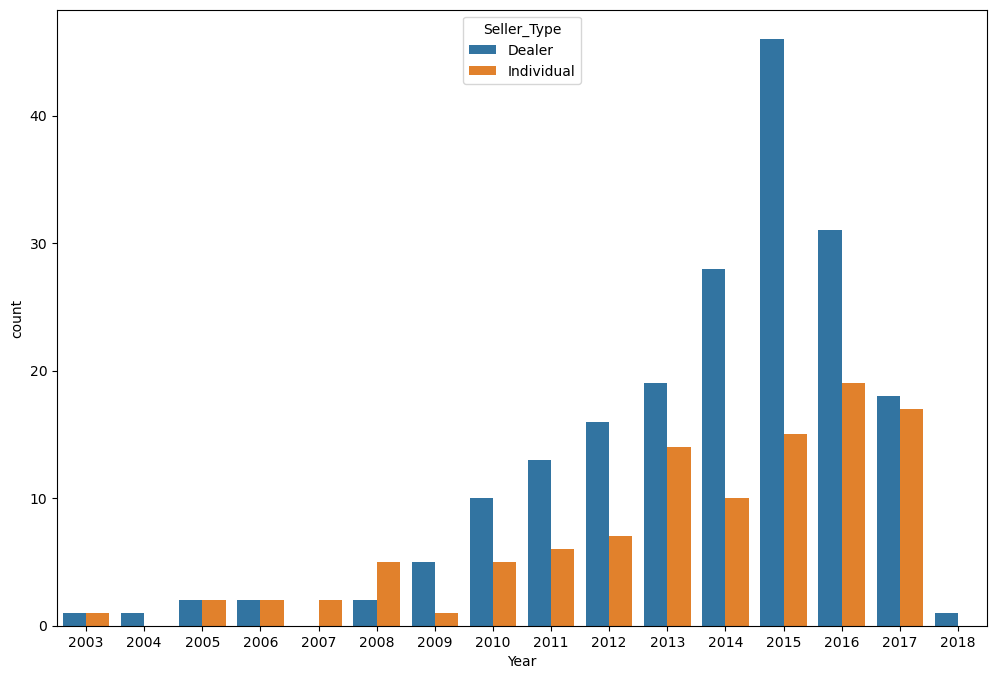

In [24]:
plt.figure(figsize=(12,8))
sns.countplot(x='Year', hue= 'Seller_Type',data = df)

# Conclusion:
Going directly to a dealership is a lot simpler way to sell your automobile quickly, easily, and for the car's full value. Since car dealers have a rapid turnover of vehicles, they are constantly searching for high-quality pre-owned vehicles to stock their showrooms.

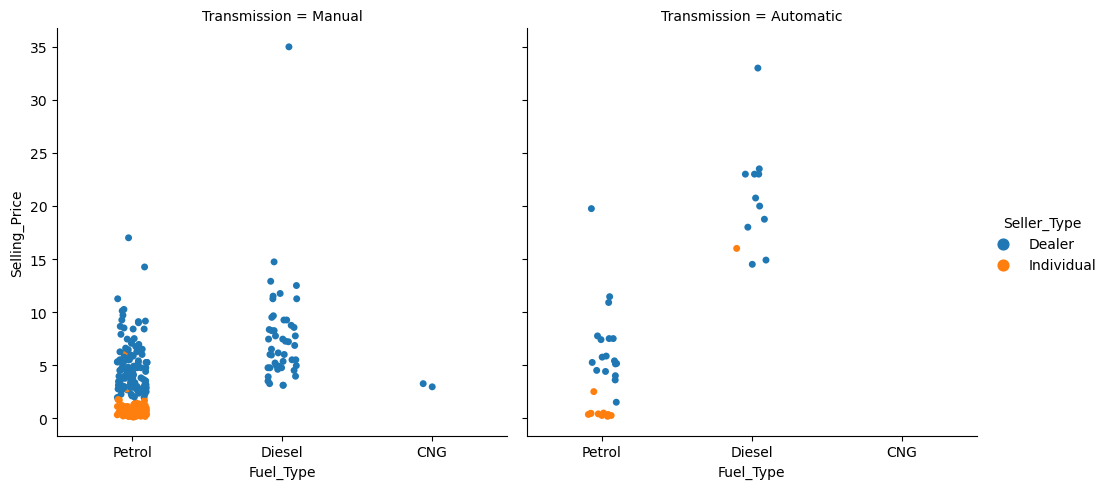

In [30]:
sns.catplot(x="Fuel_Type", y="Selling_Price", hue = 'Seller_Type',col ='Transmission', data = df)
plt.show()

# Conclusion:

Selling your car to a dealer and individual is the fastest way to get paid. Dealerships love buying and adding pre-owned vehicles to their lots because about 70% of annual vehicle sales are used cars

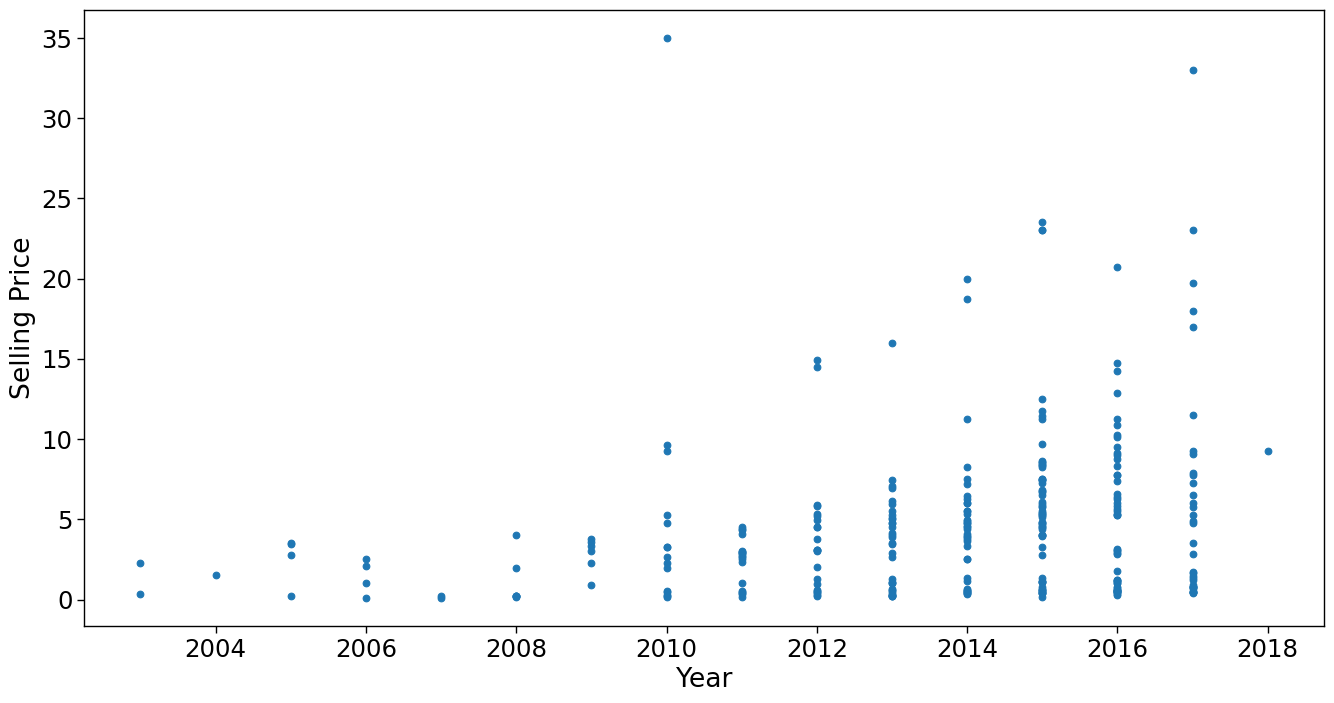

In [53]:
plt.figure(figsize=(16,8))
plt.scatter(df['Year'], df['Selling_Price'])
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.show()

# Conclusion:

As a result of a shortage of new automobiles, demand for used vehicles is increasing. Since 2012, the value of used cars is rising continously.

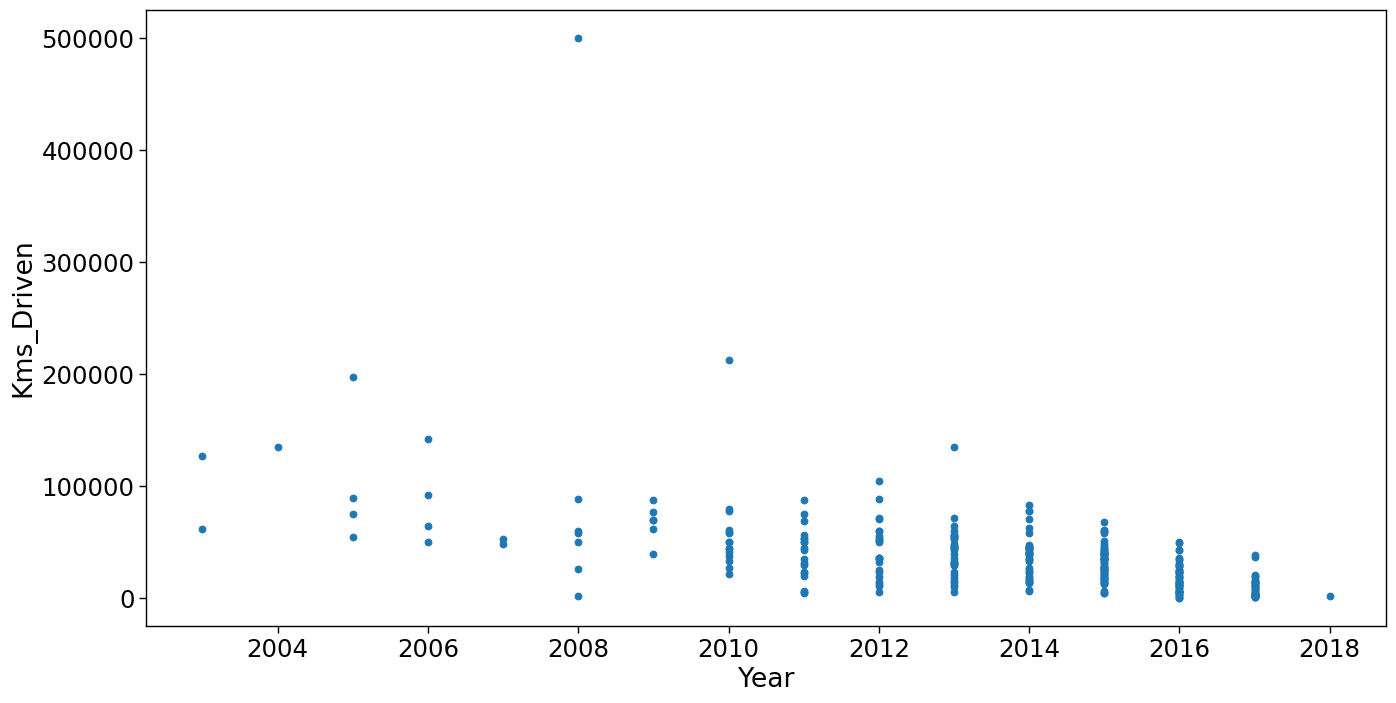

In [54]:
plt.figure(figsize=(16,8))
plt.scatter(df['Year'], df['Kms_Driven'])
plt.xlabel("Year")
plt.ylabel("Kms_Driven")
plt.show()

# Conclusion:

Since 2015, people are selling cars before driving car to 1 lakh kilometers.

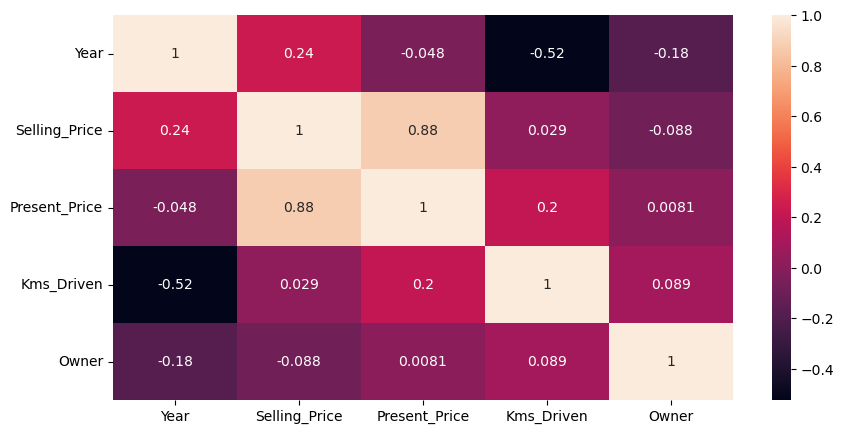

In [80]:
# Heat Map 
plt.figure(figsize = (10,5))
sns.heatmap(df[df.columns].corr(), annot = True)
plt.show()

# Conclusion:
Present price and selling are highly positve correlated.

# Encoding

In [78]:
# encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


## Taking X = Intedependent Variable 
i.e ('Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type','Transmission', 'Owner')

## Y = Dependent Variable
i.e ('Selling_Price')

In [79]:
X = car_dataset.drop(['Car_Name','Selling_Price'], axis=1)
y = car_dataset['Selling_Price']

In [80]:
print (X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [81]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [69]:
print("Shape of X is: ",X.shape)
print("Shape of y is: ", y.shape)

Shape of X is:  (301, 7)
Shape of y is:  (301,)


# Training and Testing

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [86]:
print("X_test shape:", X_test.shape)
print("X_train shape:", X_train.shape)
print("y_test shape: ", y_test.shape)
print("y_train shape:", y_train.shape)

X_test shape: (31, 7)
X_train shape: (270, 7)
y_test shape:  (31,)
y_train shape: (270,)


In [87]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [88]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Applying Machine Learning Model

In [89]:
model = LinearRegression()

model.fit(X_train, y_train)

pred = model.predict(X_test)

In [90]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [91]:
print("MAE: ", (metrics.mean_absolute_error(pred, y_test)))
print("MSE: ", (metrics.mean_squared_error(pred, y_test)))
print("R2 score: ", (metrics.r2_score(pred, y_test)))

MAE:  0.9316012656367952
MSE:  1.2517418962440987
R2 score:  0.8672541350496936


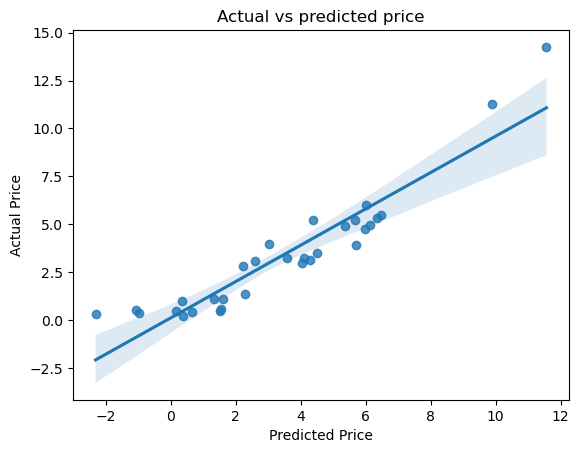

In [94]:
sns.regplot(x=pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("Actual vs predicted price")
plt.show()

# Conclusion 
Not bad, we are getting approx. 87% r-squared with all the variables.
Though this a simple model, the final predictors still seem to have high correlations. We can remove some of these features, though that will affect the r2 score significantly.